<a href="https://colab.research.google.com/github/JavokhirJambulov/AIapplicationSystem/blob/main/12204567_Midterm/Midterm_12204567.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1


In [34]:
import numpy as np

#Task 1 a: Implement the Generate Sequential Data Function
def generate_sequential_data(sequence_length, failure_probability):
    sequence = []
    is_failure_occurred = False

    for _ in range(sequence_length):
        # Simulate sensor measurements (e.g., temperature, vibration, belt speed)
        temperature = np.random.normal(70, 5)
        vibration = np.random.normal(0.2, 0.05)
        belt_speed = np.random.normal(0.8, 0.1)

        # Task 1 b: Trigger a system anomaly if a random number falls below the failure probability threshold
        if not is_failure_occurred and np.random.random() < failure_probability:
            is_failure_occurred = True

        # Create a data point with sensor measurements and system anomaly status
        data_point = {
            'temperature': temperature,
            'vibration': vibration,
            'belt_speed': belt_speed,
            'is_failure_occurred': int(is_failure_occurred)
        }
        sequence.append(data_point)

    return sequence

# Task 1 c: Generate a sequence with a specific system anomaly probability
# Generating a sequence with a low anomaly probability (e.g., 0.1)
sequence_low_anomaly = generate_sequential_data(sequence_length=50, failure_probability=0.1)

# Generating a sequence with a high anomaly probability (e.g., 0.5)
sequence_high_anomaly = generate_sequential_data(sequence_length=50, failure_probability=0.5)

# Display the generated sequences using for loop
print("Sequence with Low System Anomaly Probability:")
for data_point in sequence_low_anomaly:
    print(data_point)

print("\nSequence with High System Anomaly Probability:")
for data_point in sequence_high_anomaly:
    print(data_point)



Sequence with Low System Anomaly Probability:
{'temperature': 65.08409381356681, 'vibration': 0.20545396159970253, 'belt_speed': 0.9149452266457284, 'is_failure_occurred': 0}
{'temperature': 65.46740821502513, 'vibration': 0.12971163699134514, 'belt_speed': 0.9311057805763708, 'is_failure_occurred': 0}
{'temperature': 75.44998220541815, 'vibration': 0.21990985290831816, 'belt_speed': 0.9162107238279136, 'is_failure_occurred': 0}
{'temperature': 70.37232312021906, 'vibration': 0.19562837442889072, 'belt_speed': 0.9784942402722944, 'is_failure_occurred': 0}
{'temperature': 73.62635647656052, 'vibration': 0.12929596903705298, 'belt_speed': 0.8172291415194352, 'is_failure_occurred': 1}
{'temperature': 68.78335653459375, 'vibration': 0.2081199650563136, 'belt_speed': 1.016919283332105, 'is_failure_occurred': 1}
{'temperature': 68.87834201370771, 'vibration': 0.1999370792654741, 'belt_speed': 0.7296956283203335, 'is_failure_occurred': 1}
{'temperature': 64.05190916198737, 'vibration': 0.1017

Part A: Implement Data Generation Function

Task: Create a function to generate synthetic sequential data for conveyor belts.
Objective: Simulate sensor readings (e.g., temperature, vibration, belt speed) over time.
Importance: Realistic data is vital for training and testing predictive maintenance models.

Part B: Modify Function for Failure Detection

Task: Enhance the data generation function to include failure probability.
Objective: Simulate scenarios with and without failure detection.
Benefit: The model can learn both normal and failure patterns, enabling more robust predictions.

Part C: Generate Datasets with Varying Probabilities

Task: Create datasets with a specific number of sequences and sequence length.
Objective: Experiment with different failure probabilities for diverse maintenance scenarios.
Significance: Helps assess the model's ability to predict failures under varying conditions.

Task 2

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Part 2 A: Implement the preprocess_sequential_data Function
def preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=None):
    # Extract numerical features from the data (e.g., temperature, vibration, belt speed)
    numerical_features = [[data_point['temperature'], data_point['vibration'], data_point['belt_speed']] for data_point in data]

    # Convert the features to a NumPy array
    data = np.array(numerical_features)
    failure_labels = np.array(failure_labels)

    # Part 2 B: Use the StandardScaler to Scale Data
    scaler = StandardScaler()

    # Scale the data
    data = scaler.fit_transform(data)

    # Part 2 C: Split the Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(data, failure_labels, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test, scaler


# Generate synthetic data using your original function from task 1
data = generate_sequential_data(sequence_length=100, failure_probability=0.2)
# Extract failure labels from the data generated above
failure_labels = [data_point['is_failure_occurred'] for data_point in data]

X_train, X_test, y_train, y_test,scaler = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)

# Final results:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (80, 3)
X_test Shape: (20, 3)
y_train Shape: (80,)
y_test Shape: (20,)


Part A: Implement the preprocess_sequential_data Function

Task: Create a function to preprocess the generated sequential data for predictive maintenance.
Objective: Extract numerical features from the data, convert them into a NumPy array, and prepare the data for further processing.
Significance: Data preprocessing is a crucial step in machine learning to ensure that the data is in the right format for modeling.

Part B: Use the StandardScaler to Scale Data

Task: Apply the StandardScaler to the preprocessed data.
Objective: Scale the data to have a mean of 0 and a standard deviation of 1, making it suitable for machine learning algorithms.
Importance: Scaling ensures that features are on the same scale, which can improve the performance of machine learning models.

Part C: Split the Data into Training and Testing Sets

Task: Split the preprocessed data into training and testing sets.
Objective: Create separate datasets for training and evaluation to assess the performance of the predictive maintenance model.
Benefit: This step enables model evaluation and validation using a hold-out test set.



Task 3

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example usage:
# Generate synthetic data using your original function
data = generate_sequential_data(sequence_length=100, failure_probability=0.2)
# Extract failure labels from the data
failure_labels = [data_point['is_failure_occurred'] for data_point in data]

X_train, X_test, y_train, y_test,scaler = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)

# Assuming your data has the shape (samples, features)
# You can reshape it to (samples, timesteps, features) for the LSTM layer
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Part 3A: Create an LSTM Model using TensorFlow and Keras
model = keras.Sequential()

# Part 3B: Define the Model Architecture with Suitable Layers
model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Part 3C: Compile the Model with an Appropriate Loss Function and Optimize
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17473 (68.25 KB)
Trainable params: 17473 (68.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Part 3A: Create an LSTM Model using TensorFlow and Keras

Task: Create an LSTM (Long Short-Term Memory) model using the TensorFlow and Keras framework.
Objective: Build a neural network model that is suitable for sequential data, which is often used in time-series analysis and predictive maintenance.
Significance: LSTMs are capable of capturing long-term dependencies in data, making them a powerful choice for modeling time-series and sequential data.

Part 3B: Define the Model Architecture with Suitable Layers

Task: Define the architecture of the LSTM model by specifying the layers.
Objective: Configure the structure of the neural network, including the type and number of layers. In this case, an LSTM layer is used as the primary layer for sequence modeling, and a dense output layer is added with a sigmoid activation for binary classification.
Importance: Properly defining the model architecture is essential to ensure that the neural network can effectively learn patterns in the data.

Part 3C: Compile the Model with an Appropriate Loss Function and Optimizer

Task: Compile the LSTM model with a loss function and optimizer.
Objective: Set up the training process of the neural network by specifying the loss function (binary cross-entropy for binary classification) and the optimization algorithm (Adam optimizer).
Benefit: Compiling the model prepares it for training and evaluation, and choosing the right loss function and optimizer is crucial for model performance.

Task 4

Epoch 1/10
3/3 [==============================] - 4s 307ms/step - loss: 0.6912 - accuracy: 0.4750 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6863 - accuracy: 0.5625 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 0.6813 - accuracy: 0.6125 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 0.6765 - accuracy: 0.6875 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6719 - accuracy: 0.7500 - val_loss: 0.6792 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6671 - accuracy: 0.7750 - val_loss: 0.6757 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6623 - accuracy: 0.8250 - val_loss: 0.6722 - val_accuracy: 0.6000
Epoch 8/10
3/3 [==========

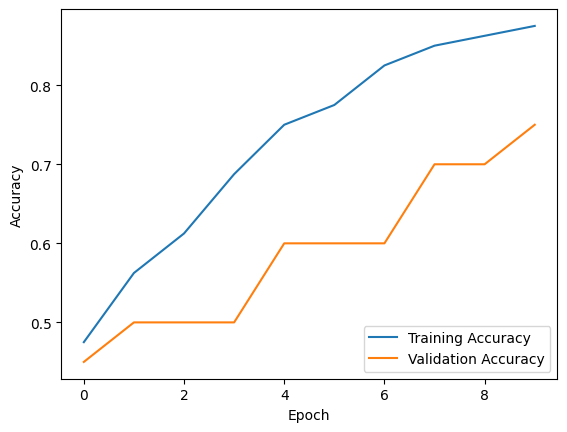

1/1 [==============================] - 0s 35ms/step - loss: 0.6615 - accuracy: 0.7500
Test Loss: 0.661456286907196
Test Accuracy: 0.75


In [33]:
# Assuming you have already executed the code for Task 1, Task 2, and Task 3

# Part 4A: Train the LSTM Model
epochs = 10  # Specify the number of training epochs
batch_size1 = 32  # Specify the batch size for training

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size1, validation_data=(X_test, y_test))

# Part 4B: Monitor the Training Process and Evaluate Model Performance
# You can monitor the training process using the 'history' object, which contains training and validation metrics.

# Example: Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Example: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Part 4A: Train the LSTM Model

Task: Train the LSTM (Long Short-Term Memory) model using the provided training data.
Objective: This part involves the actual training of the neural network model using the training data. It specifies the number of training epochs (iterations) and the batch size used in each training iteration.
Significance: Training is the phase where the model learns from the data by adjusting its internal parameters. The number of epochs and batch size can impact the model's performance and training time.

Part 4B: Monitor the Training Process and Evaluate Model Performance

Task: Monitor the training process and evaluate the model's performance.
Objective: After training, it's important to evaluate how well the model is learning. This part involves monitoring the training progress by examining metrics like accuracy, loss, or other relevant metrics. It also includes evaluating the model's performance on a test dataset.
Importance: Monitoring and evaluating the model's performance are crucial for assessing its ability to make predictions accurately and identifying potential issues or areas for improvement.

In summary, Task 4 encompasses training the LSTM model with specified epochs and batch size, and then monitoring the training process and evaluating the model's performance to ensure it meets the desired criteria.

Task 5

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import joblib  # For loading the scaler


# Get the scaler from the return value of Task 2
X_train, X_test, y_train, y_test, scaler = preprocess_sequential_data(data, failure_labels, test_size=0.2, random_state=42)



# Generate real-time data
def generate_real_time_data():
    temperature = np.random.normal(70, 5)
    vibration = np.random.normal(0.2, 0.05)
    belt_speed = np.random.normal(0.8, 0.1)

    data_point = {
        'temperature': temperature,
        'vibration': vibration,
        'belt_speed': belt_speed,
    }

    return data_point

# Define a function for making predictions
def predict_failure(data_point):
    # Create a NumPy array with the data point
    data_array = np.array([[data_point['temperature'], data_point['vibration'], data_point['belt_speed']]])

    # Scale the data using the same scaler used for training
    scaled_data = scaler.transform(data_array)

    # Reshape the data for the LSTM model
    scaled_data = scaled_data.reshape(1, 1, 3)  # 1 sample, 1 time step, 3 features

    # Make predictions using the trained model
    prediction = model.predict(scaled_data)

    return prediction

# Alerting logic
def alert_maintenance(prediction):
    if prediction > 0.5:
        print("Failure predicted! Alert maintenance team.")
    else:
        print("No immediate maintenance required.")

# Set the number of iterations
iterations = 30
current_iteration = 0

# Real-time simulation and prediction
while current_iteration < iterations:
    data_point = generate_real_time_data()
    prediction = predict_failure(data_point)
    alert_maintenance(prediction)

    current_iteration += 1

    # Simulate a time interval between data points
    time.sleep(10)  # Sleep for 10 seconds between data points

1/1 [==============================] - 0s 36ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 49ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 28ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 23ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 24ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 28ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 23ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 22ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 37ms/step
Failure predicted! Alert maintenance team.
1/1 [==============================] - 0s 23ms/step
No immediate maintenance required.
1/1 [==============================] - 0s 22ms/step
No immediate maintenance required.
1/1 [======================

Part 5A: Generate Real-Time Data

Task: Generate real-time data for the conveyor belts, simulating sensor readings like temperature, vibration, and belt speed.

Objective: This part is responsible for generating synthetic sensor data as if it's coming in real-time from the conveyor belt system. This data is used for making predictions of potential failures.

Significance: Real-time data generation is crucial for testing the model's ability to provide predictive maintenance based on incoming data.

Part 5B: Make Predictions with the LSTM Model

Task: Use the trained LSTM model from Task 4 to make predictions on the real-time data.
Objective: After generating real-time data, the model is utilized to make predictions regarding potential failures. The data is scaled and reshaped to match the model's input format.

Importance: Predictions are essential for identifying whether maintenance is needed. The LSTM model has learned patterns from the training data and can provide valuable insights.

Part 5C: Implement Alerting Logic

Task: Implement alerting logic to notify maintenance teams when a failure is predicted.
Objective: Based on the model's predictions, alerting logic is used to determine whether a failure is likely. When a failure is predicted, an alert is sent to the maintenance team.
Significance: Alerting is a critical aspect of predictive maintenance. It ensures that the right action is taken promptly when potential issues are detected, minimizing downtime and preventing failures.

**Task 6:** Complete the Assignment:

a) Run the simulation for a specified number of iterations. In my case it's 30 iterations.